In [1]:
import scipy.signal as sig
import numpy as np
from scipy.fftpack import fft, ifft, fftshift
import matplotlib.pyplot as plt
#!pip install fixedpoint
from fixedpoint import FixedPoint


def fixedToFloat(array):
    result = []
    for num in array:
      result.append(float(num))
    return result

def arrayFixedPointValue(initial_value, fx_array_len, qformat):
    # Retorna: un array con initial_value en todas sus posiciones, de longitud
    # fx_array_len, con el formato
    # qformat = {'signed': <True/False>, 'm': <BitsEnteros>, 'n': <BitsFracc>}
    fx_type = FixedPoint(initial_value, **qformat)
    fx_array = [fx_type for _ in range(fx_array_len)]
    return fx_array

def arrayFixedPoint(initial_array, qformat):
    # Retorna: un array con los valores de initial_array convertidos
    # a fixed point, de la misma longitud
    # con el formato
    # qformat = {'signed': <True/False>, 'm': <BitsEnteros>, 'n': <BitsFracc>}
    fx_array = []
    for num in initial_array:
      fx_num = FixedPoint(num, **qformat)
      fx_array.append(fx_num)
    return fx_array

scipy.signal.remez(numtaps, bands, desired, weight=None, Hz=None, type='bandpass', maxiter=25, grid_density=16, fs=None)

Calculate the minimax optimal filter using the Remez exchange algorithm.

Calculate the filter-coefficients for the finite impulse response (FIR) filter whose transfer function minimizes the maximum error between the desired gain and the realized gain in the specified frequency bands using the Remez exchange algorithm.

<ipython-input-2-349c2fbd4bc6>:20: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(abs(hq)), 'r')


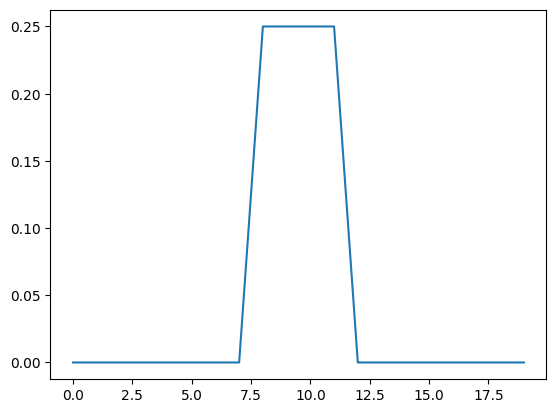

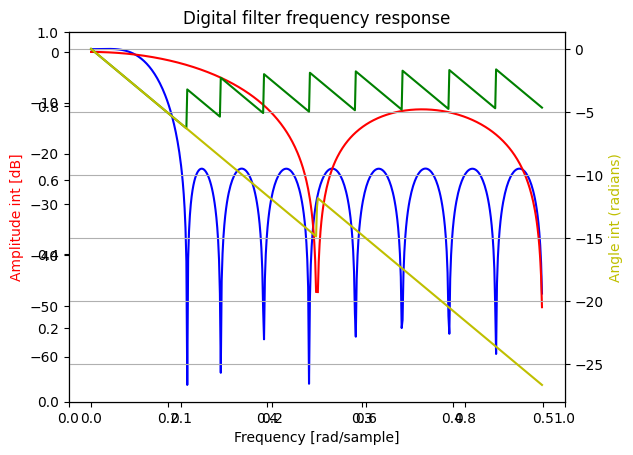

In [2]:
qformat = {'signed': True, 'm': 6, 'n': 2}

b = sig.remez(20, [0, 0.05, 0.10, 0.5], [1, 0],maxiter=100)
c = arrayFixedPoint(b,qformat)
#ones = np.ones(1)
#zeros = np.zeros(20)
#dirac = np.concatenate((zeros,ones,zeros), axis=0)
#for i in range(len(dirac)):
#    b[i] = dirac[i] - b[i]
#b[20]=b[20]-1
plt.plot (c)
w, h = sig.freqz(b)
w, hq = sig.freqz(c)
w = w/(2*np.pi)
fig = plt.figure()
plt.title('Digital filter frequency response')
ax1 = fig.add_subplot(111)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.plot(w, 20 * np.log10(abs(hq)), 'r')
plt.ylabel('Amplitude int [dB]', color='r')
plt.xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
angles_q = np.unwrap(np.angle(hq))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.plot(w, angles_q, 'y')
plt.ylabel('Angle int (radians)', color='y')
plt.grid()
plt.axis('tight')
plt.show()